In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Zip file contains only the csv, so you can access it directly with read_csv
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

# Zip file contains only the csv, so you can access it directly with read_csv df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')
#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [4]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df['gender'].unique()

array(['Female', 'Male', '?', 'Unknown/Invalid'], dtype=object)

In [6]:
df['gender'] = df['gender'].replace('?','Unknown/Invalid')

In [7]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [8]:
df['weight'] = df['weight'].replace('?',np.NaN)

In [9]:
df['weight'].value_counts()

[75-100)     1335
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [10]:
df['time_in_hospital'] = df['time_in_hospital'].replace('?',np.NaN)
df['time_in_hospital'].unique()


array([ 1.,  3.,  2.,  4.,  5., 13., 12.,  9.,  7., 10.,  6., 11.,  8.,
       14., nan])

In [11]:
df['weight'].unique()


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

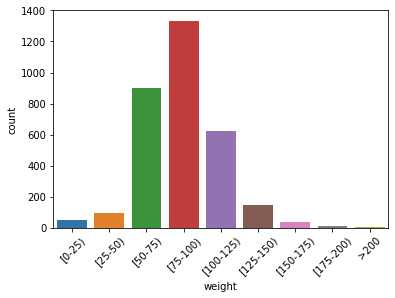

In [12]:
sns.countplot(df['weight'], order = ['[0-25)','[25-50)','[50-75)','[75-100)','[100-125)', '[125-150)','[150-175)','[175-200)','>200'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

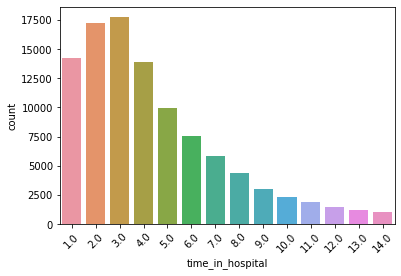

In [13]:
sns.countplot(df['time_in_hospital'])
plt.xticks(rotation=45)

In [17]:
df.replace('?', np.nan, inplace=True)

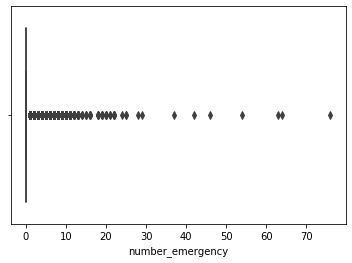

In [30]:
sns.boxplot(df["number_emergency"])

C:\Users\rjstr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rjstr\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


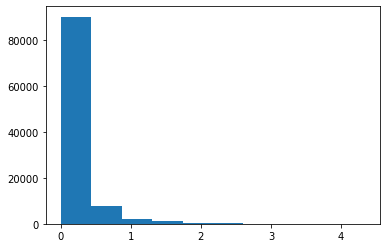

In [56]:
plt.hist(np.log(df["number_emergency"] + 1))
plt.show()

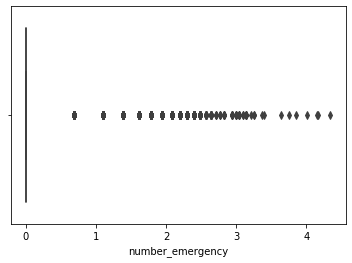

In [53]:
sns.boxplot(np.log(df["number_emergency"] + 1))
plt.show()

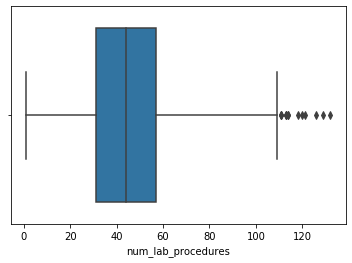

In [49]:
sns.boxplot(df["num_lab_procedures"], whis=2)
plt.show()

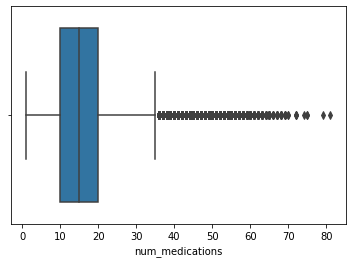

In [58]:
sns.boxplot(df["num_medications"])
plt.show()

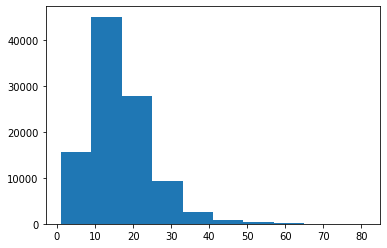

In [60]:
plt.hist(df["num_medications"])
plt.show()